# The CIFAR - 10 dataset

SSL stands for Secure Sockets Layer and is designed to create secure connection between client and server. Secure means that connection is encrypted and therefore protected from eavesdropping. It also allows to validate server identity.

So here we are creating a secure network

## Importing Necessary Libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ssl     # for security
ssl._create_default_https_context = ssl._create_unverified_context




#Checking the versions
print('Pandas :{}'.format(pd.__version__))
print('Numpy :{}'.format(np.__version__))
print('Tensorflow :{}'.format(tf.__version__))


Pandas :1.3.5
Numpy :1.21.6
Tensorflow :2.9.2


## Data Preprocessing

### Importing the Data

CIFAR - 10

From the keras library and datasets module importing CIFAR10 dataset.The CIFAR-10 Dataset already present in Keras as a standard Dataset for Object Recognition


In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test,  y_test) = cifar10.load_data()

Checking the shape of the dataset

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))


Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


We observe that there are 50k training images and 10k testing imgaes, 3 channels as RGB images and the size is 32x32

Checking the shape of the first image to check whether its compatible with the dataset

In [4]:
X_train[0].shape

(32, 32, 3)

**Observation**- Perfect dimenesion and shape, if not correct we may have to transpose to get to usable format 

Visualizing the first image

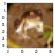

In [5]:
# Frog
plt.figure(figsize=(3,3),dpi=20)
plt.imshow(X_train[0])

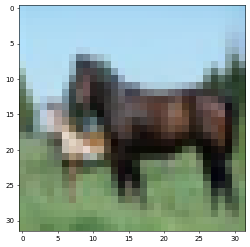

In [6]:
# Horse
plt.figure(figsize=(6,6),dpi=50)
plt.imshow(X_train[12])

Creating a grid of 3x3 images to see what these images look like

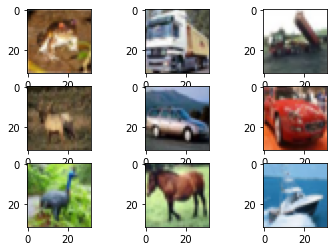

In [7]:

for i in range(0,9):
    axis=plt.subplot(3,3, 1 +i)          #plotting in 3x3 position 
    img=X_train[i]  
    plt.imshow(img)
    
plt.show()

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
X_train[0].shape #Checking the shape of the datapoint

(32, 32, 3)

In [10]:
X_train.max() #maximum pixels in the training data which ranges from 0 to 255

255

## Feature Scaling

In [11]:
X_train = X_train/255

Since each pixel takes a valiue between 0 and 255 so dividing by 255 we are features scaling

In [12]:
X_test = X_test/255

In [13]:
X_train.shape #Checking the shape of the training data after feature scaling

(50000, 32, 32, 3)

In [14]:
X_test.shape 

(10000, 32, 32, 3)

In [15]:
# Looking at class labels shape
print(y_train.shape)
print(y_train[0])
print(len(np.unique(y_train)))

(50000, 1)
[6]
10


**Observations**
There are 50000 values of length 1
 
 6 is the category they belong to data point 1
 
 No of unique classes =10

In [16]:
print(y_test.shape)

print(len(np.unique(y_test)))

(10000, 1)
10


**Observations** There are 10000 values of length 1



No of unique classes =10



## Encoding the catgorical columns in the dataset

to_categorical class: Converts a class vector (integers) to binary class matrix.

In [17]:
from tensorflow.keras.utils import to_categorical

We are converting the training data into categorical data

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

In [21]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Building the CNN model

Importing the necessary  libraries for model building

**Conv2D**: We find this under the layers module .2D convolution layer (e.g. spatial convolution over images).
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of output.

**MaxPooling2D**: this is used during the max pooling step.

**ZeroPadding2D**: this layer can add rows and columns of zeros at the top, bottom, left and right side of an image tensor.

**Flatten & Global Average Pooling**

**Flatten** will take a tensor of any shape and transform it into a one dimensional tensor (plus the samples dimension) but keeping all values in the tensor. For example a tensor (samples, 10, 20, 1) will be flattened to (samples, 10 * 20 * 1). it converts to 1D array that is then fed to the ANN

**GlobalAveragePooling2D** does something different. This function is used to operate global average pooling for given data.
For example, suppose we have an input feature map of dimensions height(h), width, and depth. When we pass this input layer into the global average pooling operation then it will calculate the average value of every single map and returns the average value to the output node.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

## Initialising the CNN

In [23]:
model =  Sequential() #buiding an instance model which is a sequence of layers

## Step 1: Convolution

Adding the first convolution layer

In [24]:
# First set of layers

# Convolution layer
model.add(Conv2D(filters = 32,  kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))



**add method** is called on model object to add our very first layer which will be an object of Conv2D class.
from the keras library we call layers module from where we call the Conv2D class
the **filters** parameter is for how many feature detectors we want and the **kernel size** specifies the no of rows and columns of the feature map(4x4)
so  32 is the no of feature detectors and the size of those are 4x4.

**input_shape**: the input_shape specifies the shape.
 so we specify the input_shape as (32,32,3) where 3  is for RGB.

 **Activations** can either be used through an Activation layer, or through the activation argument supported by all forward layers. relu:Applies the rectified linear unit activation function.

With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

## Step 2: Max Pooling

Layers module having the MaxPool2d class

pool_size=2 i.e. we apply a 2x2 max pool filter

In [25]:
# Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

## Adding the second set of layers and max pooling

In [26]:
# Second set of layers

# Convolution layer
model.add(Conv2D(filters = 32,  kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

# Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

## Step 3: Flattening

converting the convolutional layer and pooling layer into a one dimensional vector that we will feed to our CNN from keras library we call the layers module and the flatten class.

In [27]:
# Flatten
model.add(Flatten())

## Step 4: Fully Connected Layer

**Dense** is used to add a fully connected layer to our model. we call the dense class which takes parameters units. **units**: Positive integer, dimensionality of the output space. you want to have, with high no of neurons we get better accuracy. Here we take 256 neurons,then add a rectifier activation function.

**Dropout**:  Using it for regularization to avoid overfitting, a common problem in Neural Networks

In [28]:
from keras.layers.core import Dense, Dropout, Activation 

In [29]:

model.add(Dense(256,  activation = 'relu'))

# Step 5: Final Output Layer

softmax activation function: Softmax converts a vector of values to a probability distribution.The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [30]:
model.add(Dense(10, activation = 'softmax')) #Since we have 10 classes so no of output nodes=10

## Step 6: Compiling the model

.compile : configures the model for training.

rmsprop: Optimizer that implements the RMSprop algorithm.

The gist of RMSprop is to:

Maintain a moving (discounted) average of the square of gradients
Divide the gradient by the root of this average
This implementation of RMSprop uses plain momentum,


loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

Note:For binary prediction the loss function is binary_crossentropy and here since we have more than 2 classes i.e. 10 classes our loss function is categorical_crossentropy

Categorical crossentropy: Computes the crossentropy loss between the labels and predictions.We use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.

Accuracy : the metrics for evaluation. The accuracy class calculates how often predictions equal labels.

In [31]:
# Compiling
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## SUMMARY

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

**early Stopping** :Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.


**monitor**: Quantity to be monitored.

**val_loss** is the value of cost function for your cross-validation data and loss is the value of cost function for your training data. On validation data, neurons using drop out do not drop random neurons. The reason is that during training we use drop out in order to add some noise for avoiding over-fitting.

**patience**: Number of epochs with no improvement after which training will be stopped.

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss',  patience = 3)

## Training the model

In [35]:
model.fit(X_train,  y_cat_train, epochs=5,
          validation_data = (X_test,  y_cat_test),
          callbacks = [early_stop])

Epoch 1/5
1563/1563 [==============================] - 104s 65ms/step - loss: 1.5134 - accuracy: 0.4587 - val_loss: 1.3491 - val_accuracy: 0.5252
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1684 - accuracy: 0.5891 - val_loss: 1.1775 - val_accuracy: 0.5918
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0190 - accuracy: 0.6441 - val_loss: 1.0612 - val_accuracy: 0.6245
Epoch 4/5
1563/1563 [==============================] - 87s 55ms/step - loss: 0.9118 - accuracy: 0.6856 - val_loss: 1.0166 - val_accuracy: 0.6595
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8316 - accuracy: 0.7149 - val_loss: 1.0413 - val_accuracy: 0.6535


In [36]:
model.save('cifar_5epochs.h5') #Saving the model

In [37]:
losses = pd.DataFrame(model.history.history) #Saving the history of the model by converting into a pandas dataframe into the losses variable

In [38]:
losses.head() #Checking the losses variable

,loss,accuracy,val_loss,val_accuracy
0,1.513369,0.45874,1.349069,0.5252
1,1.168364,0.58906,1.177458,0.5918
2,1.018963,0.64412,1.061221,0.6245
3,0.911766,0.68562,1.016644,0.6595
4,0.831598,0.71488,1.041340,0.6535


### Showing the plot between accuracy and val accuracy

val_acc refers to a set of samples that was not shown to the network during training and hence refers to how much our model works in general for cases outside the training set.

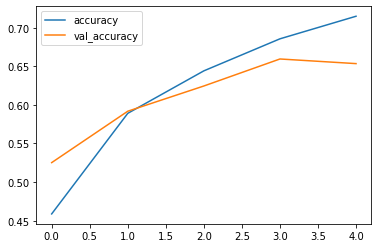

In [39]:
losses[['accuracy', 'val_accuracy']].plot()

It is common for validation accuracy to be lower than accuracy. . If validation accuracy is much lower than accuracy, we are certainly over fitting.

## Plotting the comparison between loss and val loss




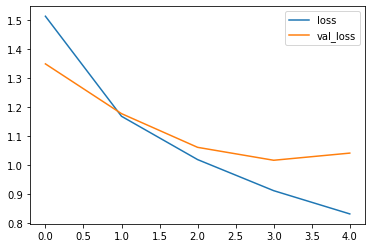

In [40]:
losses[['loss','val_loss']].plot()

When we are training the model in keras, accuracy and loss in keras model for validation data could be variating with different cases. Usually with every epoch increasing, loss should be going lower and accuracy should be going higher.

But with val_loss(keras validation loss) and val_acc(keras validation accuracy), many cases can be possible like below:

val_loss starts increasing, val_acc starts decreasing. This means model is cramming values not learning

val_loss starts increasing, val_acc also increases.This could be case of overfitting or diverse probability values in cases where softmax is being used in output layer

val_loss starts decreasing, val_acc starts increasing. This is also fine as that means model built is learning and working fine.





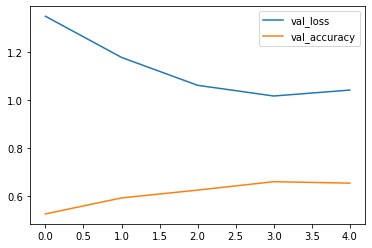

In [41]:
losses[['val_loss','val_accuracy']].plot()

In our case the val loss is decreasing and val accuracy is increasing , so ourmodel is learning and working fine

## Evaluation

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
print(model.metrics_names)
print(model.evaluate(X_test,  y_cat_test, verbose = 0))

['loss', 'accuracy']
[1.0413398742675781, 0.6535000205039978]


Our model accuracy is 65.35 % accurate. So we can say that our model shows a good accuracy score but there might be overfitting

Confusion Matrix

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(X_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 14ms/step


In [45]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.86      0.71      0.78      1000
           2       0.53      0.58      0.55      1000
           3       0.42      0.53      0.47      1000
           4       0.65      0.58      0.61      1000
           5       0.51      0.63      0.56      1000
           6       0.89      0.61      0.72      1000
           7       0.76      0.67      0.71      1000
           8       0.65      0.87      0.74      1000
           9       0.80      0.72      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.66     10000
weighted avg       0.68      0.65      0.66     10000



 F1 score is a weighted harmonic mean of precision and recall.An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0 .

In [46]:
confusion_matrix(y_test,predict_classes)

array([[643,  11,  61,  26,  25,  11,   1,  13, 180,  29],
       [ 27, 712,  18,  32,   6,  11,   7,   5,  90,  92],
       [ 64,   7, 583, 113,  80,  89,  14,  23,  19,   8],
       [ 29,   5,  77, 528,  48, 226,  16,  31,  23,  17],
       [ 22,   2, 112, 110, 577,  78,  13,  57,  25,   4],
       [ 14,   1,  59, 197,  30, 631,  11,  42,  12,   3],
       [ 11,   8, 110, 128,  44,  52, 608,  11,  23,   5],
       [ 12,   3,  53,  76,  60, 101,   5, 667,   7,  16],
       [ 37,  17,  14,  20,  10,  16,   4,   3, 868,  11],
       [ 26,  64,  20,  37,   5,  21,   4,  21,  84, 718]])

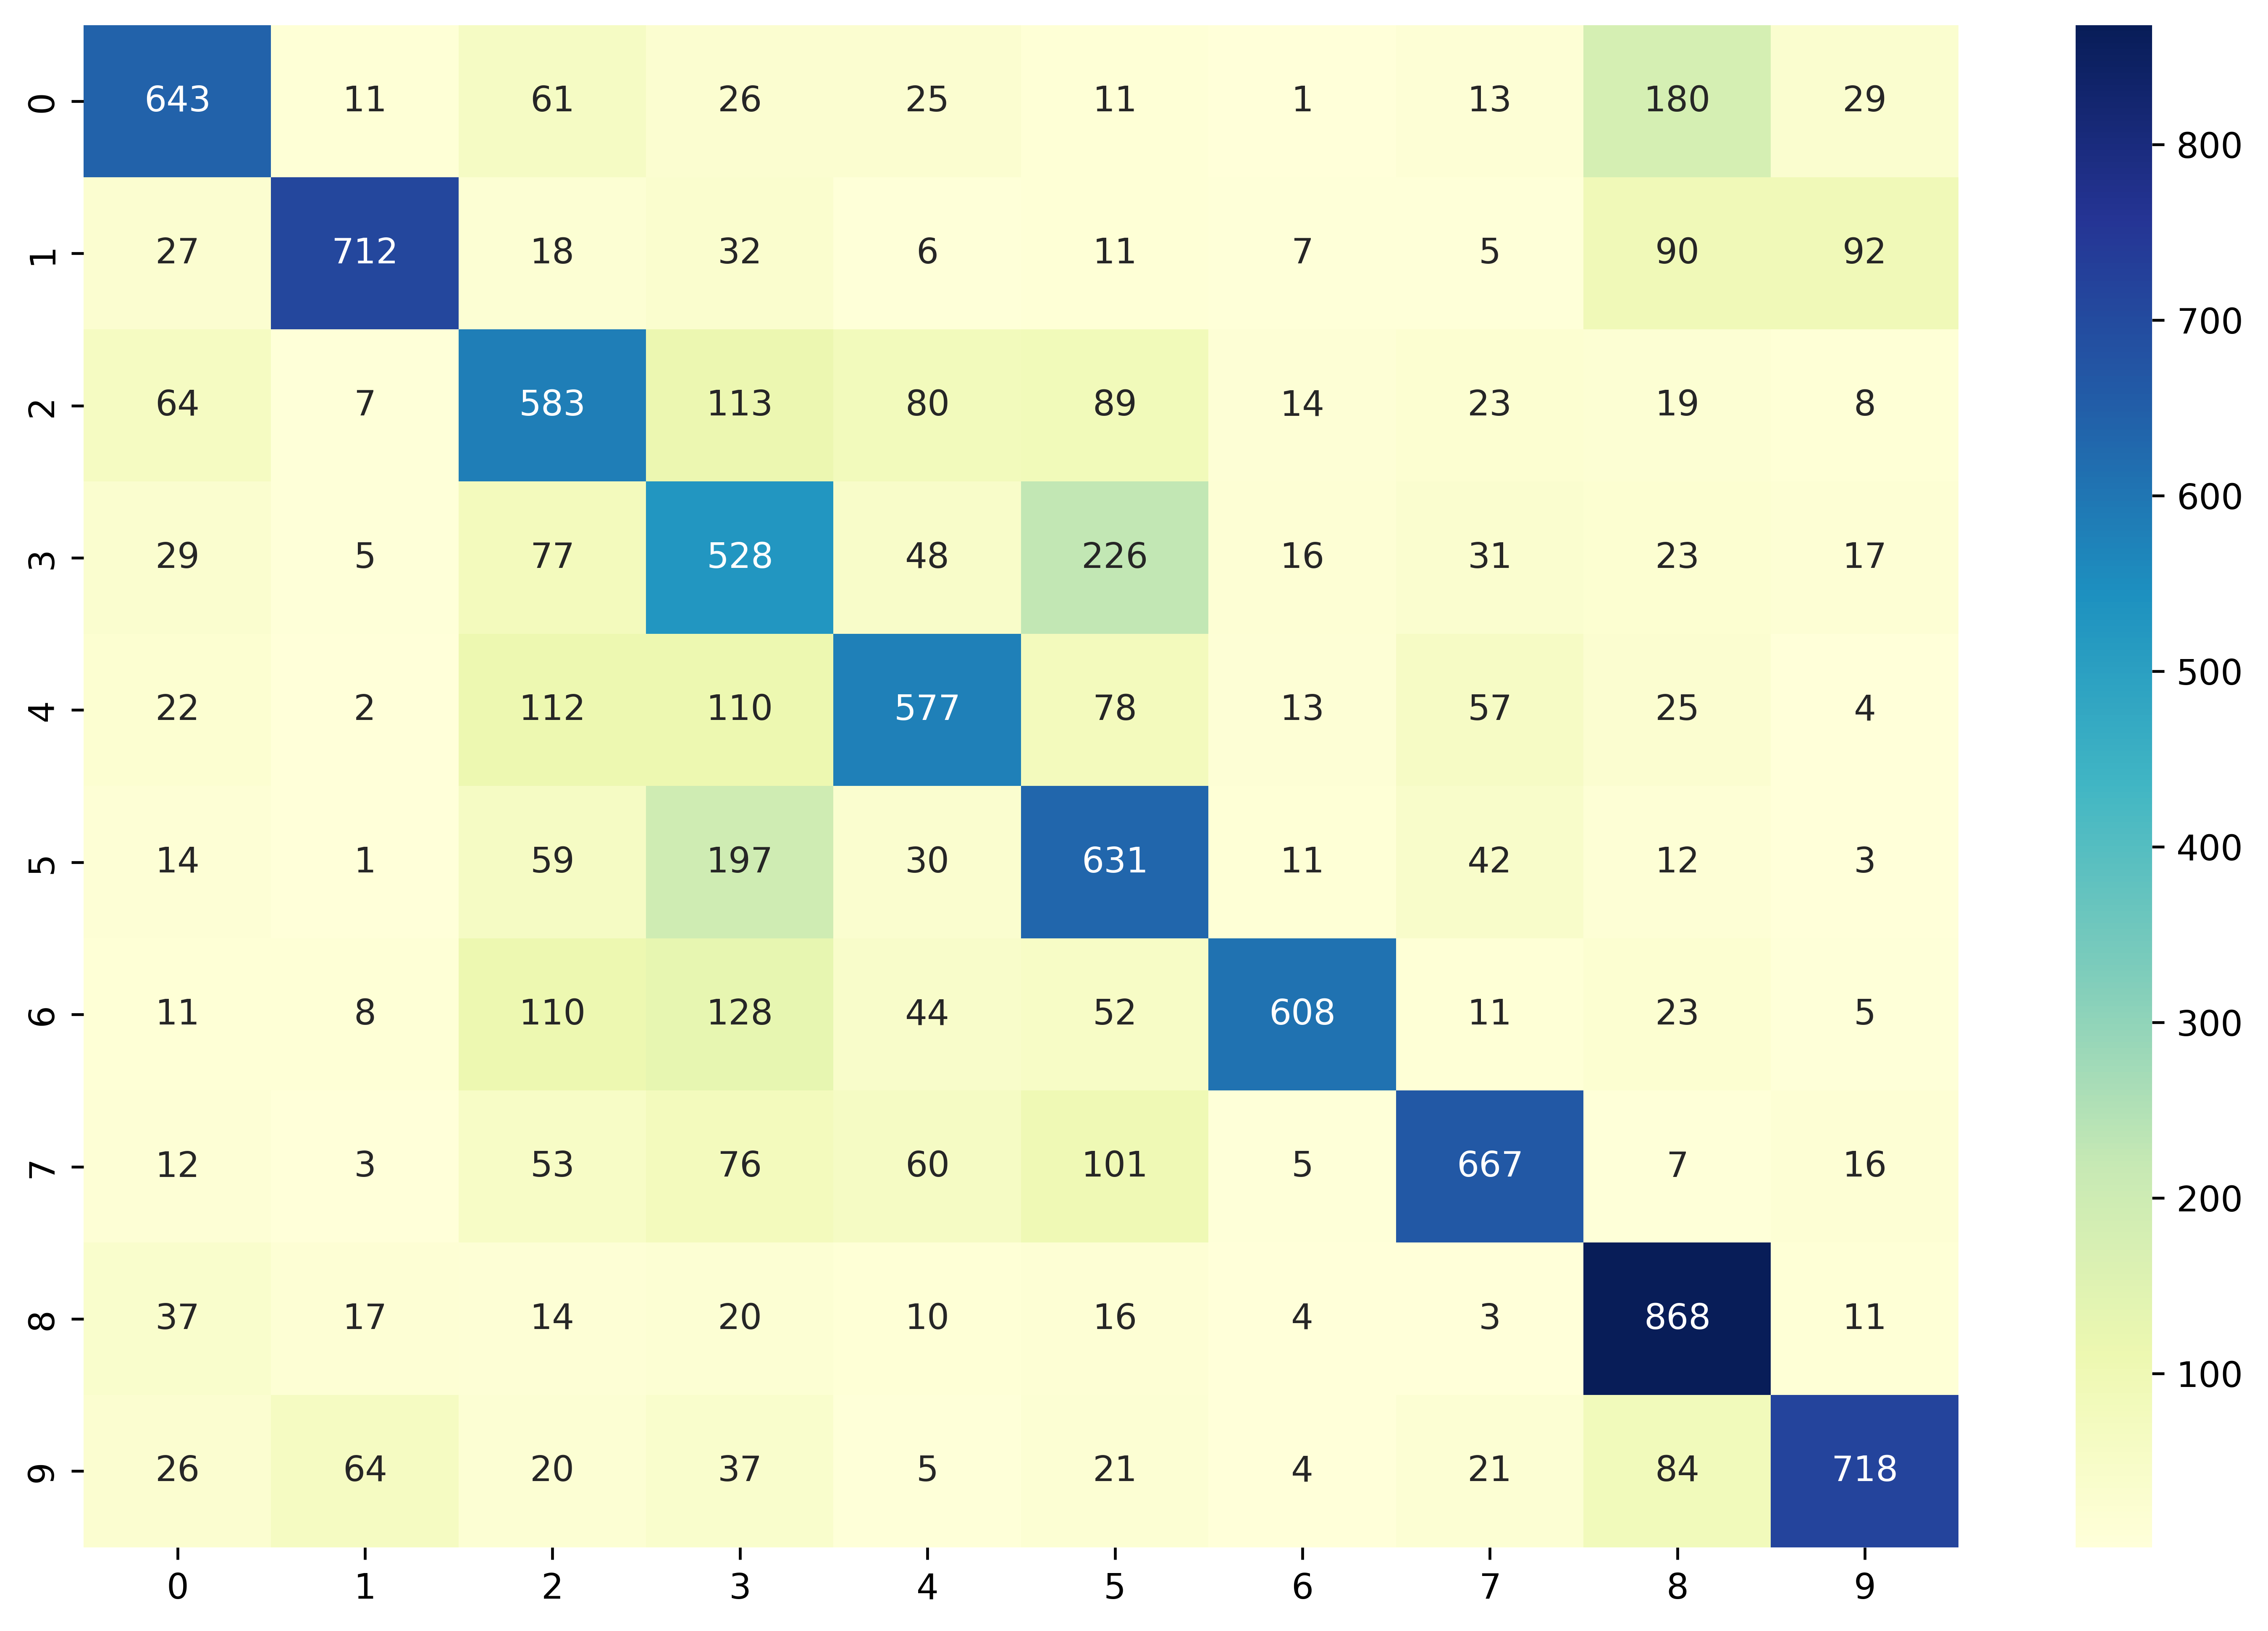

In [47]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

In [48]:
my_image = X_test[10]

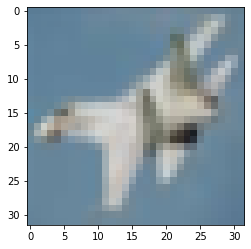

In [49]:
plt.imshow(my_image);

In [50]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 20ms/step


array([[0.419282, 0.000005, 0.091575, 0.080260, 0.142216, 0.097301,
        0.000358, 0.000628, 0.168265, 0.000110]], dtype=float32)

With a complex sequential model with multiple convolution layers and 5 epochs for the training, we obtained an accuracy of 0.65.
After investigating the validation accuracy and loss, we understood that the model is little overfitting.Since our validation accuracy is quite lower than accuracy, we are certainly over fitting.


Model may be retrained with Dropout layers to reduce overfitting.